# The Knapsack Problem

You can run a cell either by clicking `Run` on the toolbar or by pressing `CTRL+RETURN`. Pressing `SHIFT+RETURN` will run the cell and move the pointer to the next one. For a complete list of keyboard shortcuts press `H`.

## Introduction

In this Jupyter notebook we are going to model the 0-1 knapsack problem together. We will use visualizations extencively to make sure that you can easily follow the process. We encourage you to also use visualizations when you are working alone.  
Now, let us define the problem.

We are given a knapsack with capacity $b$ as well as $n$ items of size $a_i$ and profit $p_i, i \in \{1, \ldots ,n\}$.  
Our task is to *maximize* the total profit of the items that we decide to pack into the knapsack while respecting its capacity.

Run the cell below to import all the necessary libraries. In this case we import `Gurobi` and `matplotlib`. The second library will be used for plotting a couple of graphs later.

In [9]:
from gurobipy import Model, GRB, quicksum
import matplotlib.pyplot as plt

# Enable high resolution plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/d2/mt1lx56d3fgcjljy594lkjn80000gn/T/ipykernel_3609/3890301411.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Data

Below you will find the data supplied by your professor/manager/friend/etc.  
The following data is available to you:  
`b`: the capacity of the knapsack  
`n`: the number of items  
`a`: a list containing the sizes of the items  
`p`: a list containing the profits of the items  
`items`: for your convenience, a list of item "names"; in our case $\{0,\ldots,n-1\}$

In [6]:
b = 40
a = [3, 6, 3, 2, 3, 3, 9, 12, 5, 3, 8, 1]
p = [4, 5, 3, 5, 5, 1, 12, 20, 9, 3, 10, -1]
assert len(a) == len(p), "The lists a and p need to have equal length"
n = len(a)
items = range(n)

print(f'We are given {n} items. The capacity of the knapsack is {b}.')

We are given 12 items. The capacity of the knapsack is 40.


## Model

We start off by creating an empty model `m`.<br>
Reference: [Model()](https://www.gurobi.com/documentation/9.0/refman/py_model2.html)

In [10]:
m = Model('knapsack')

Then we add the necessary variables.  
In our case, we will need $n$ binary variables. The variables, let us call them $x_i$, will depict whether the item $i\in \{0, \ldots, n-1\}$ is packed or not.  
Reference: [addVars()](https://www.gurobi.com/documentation/9.0/refman/py_model_addvars.html)

In [11]:
x = m.addVars(n, vtype=GRB.BINARY, name='x')

Now, before we can start constructing our model, we need to formulate the objective function and the constraints "on paper".  
We want to maximize the total value of the items in the knapsack. Hence, our objective function can be written as
$$max \sum_{i=1}^np_ix_i$$
We will use the efficient function `quicksum()` provided in the `Gurobi` library.<br>
Reference: [setObjective()](https://www.gurobi.com/documentation/9.0/refman/py_model_setobjective.html), [quicksum()](https://www.gurobi.com/documentation/9.0/refman/py_quicksum.html)

In [12]:
m.setObjective(quicksum(p[i] * x[i] for i in items), GRB.MAXIMIZE)

We'll run the model once without adding any constraints to see what happens.  
Reference: [update()](https://www.gurobi.com/documentation/9.0/refman/py_model_update.html), [optimize()](https://www.gurobi.com/documentation/9.0/refman/py_model_optimize.html)

In [13]:
m.update()
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 0 rows, 12 columns and 0 nonzeros
Model fingerprint: 0xf5218339
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 77.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 77 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.700000000000e+01, best bound 7.700000000000e+01, gap 0.0000%


Using a bit of Python magic, we can print out the optimal objective value and packed items.<br/>
Reference: [ObjVal](https://www.gurobi.com/documentation/9.0/refman/objval.html), [Variable Attributes](https://www.gurobi.com/documentation/9.0/refman/variable_attributes.html)

In [14]:
print('The total profit is', round(m.ObjVal, 2))
packed_items = [int(v.varName[2:-1]) for v in m.getVars() if v.x > .5]
print('We packed the items', ', '.join([str(i) for i in packed_items]))

The total profit is 77.0
We packed the items 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10


As expected, all items have been packed into the knapsack except for the last one, since packing the last item would decrease the total profit.  
We can visualize the current optimal solution. We will define a helper function `draw_knapsack()`, which we are going to reuse later. This function will draw the current contents of the knapsack for us. The packed items will be labeled and the knapsack capacity will be marked red.

In [15]:
def draw_knapsack(title=None):
    plt.figure(figsize=(12, 2))
    plt.plot((b, b), (0, 1), lw=2, color='r')
    current_size = 0
    for i in packed_items:    
        plt.bar(current_size+a[i]/2, height=1, width=a[i], edgecolor='k', color='#CAEFD1')
        plt.text(current_size+a[i]/2, .45, i, ha='center', va='bottom')
        current_size += a[i]
    plt.yticks([])
    plt.autoscale(enable=True, axis='both', tight=True)
    plt.xlabel('Total size')
    if title:
        plt.title(title)
    plt.show()

Now we call `draw_knapsack()` and see, that our knapsack is overpacked. Obviously, this is the case, because we haven't yet added the capacity constraint to our model.

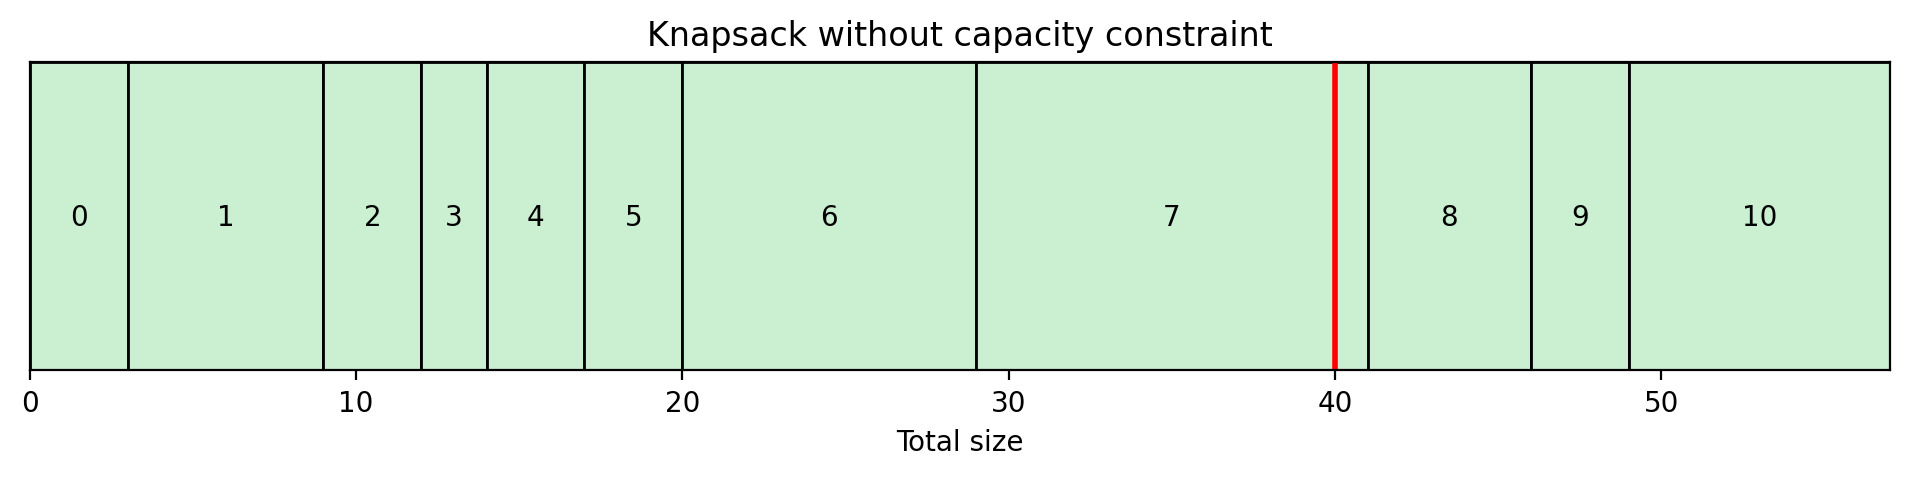

In [16]:
draw_knapsack('Knapsack without capacity constraint')

The capacity constraint may be written as
$$\sum_{i=1}^n a_i x_i \leq b$$
Let us add this constraint to our model. We will once again use the `quicksum()` method.  
Reference: [addConstr()](https://www.gurobi.com/documentation/9.0/refman/py_model_addconstr.html), [quicksum()](https://www.gurobi.com/documentation/9.0/refman/py_quicksum.html)

In [17]:
m.addConstr(quicksum(a[i] * x[i] for i in items) <= b)

<gurobi.Constr *Awaiting Model Update*>

Update the model to process the pending modifications (added variables and constraints) and run the optimization.<br/>
Reference: [update()](https://www.gurobi.com/documentation/9.0/refman/py_model_update.html), [optimize()](https://www.gurobi.com/documentation/9.0/refman/py_model_optimize.html)

In [18]:
m.update()
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 12 columns and 12 nonzeros
Model fingerprint: 0xe6539635
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 4e+01]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint R0 by 17.000000000

Found heuristic solution: objective 47.0000000
Presolve removed 1 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 61 47 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.100000000000e+01, best bound 6.100000000000e+01, gap 0.0000%


Let us retrieve the new optimal objective value as well as the packed items. Note that fewer items have been packed and the optimum is lower.<br/>
Reference: [ObjVal](https://www.gurobi.com/documentation/9.0/refman/objval.html), [Variable Attributes](https://www.gurobi.com/documentation/9.0/refman/variable_attributes.html)

In [19]:
print('The total profit is', round(m.ObjVal, 2))
packed_items = [int(v.varName[2:-1]) for v in m.getVars() if v.x > .5]
print('We packed the items', ', '.join([str(i) for i in packed_items]))

The total profit is 61.0
We packed the items 3, 4, 6, 7, 8, 10


Take a look at the knapsack.

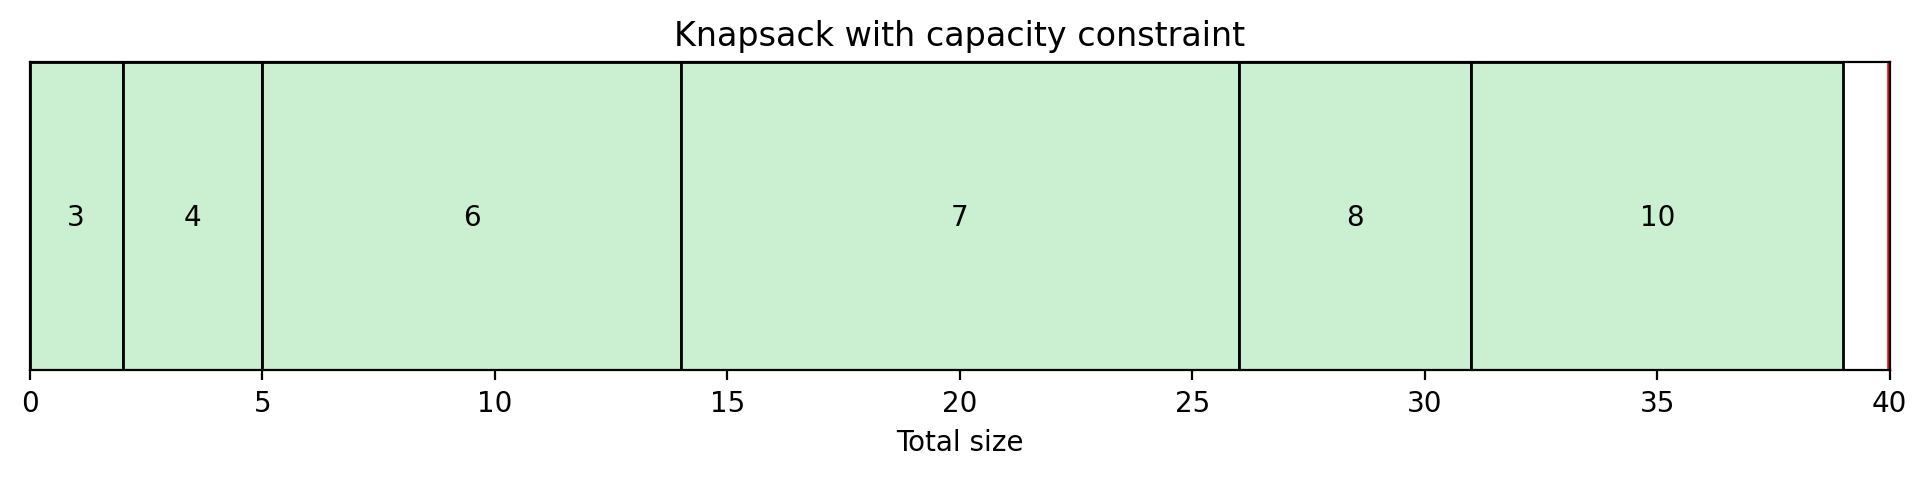

In [20]:
draw_knapsack('Knapsack with capacity constraint')

We can also manually check the solution (which we usually don't have to).

In [21]:
for i in packed_items:
    print(f'Item {i} | Size: {a[i]} | Profit: {p[i]}')

total_size = sum(a[i] for i in packed_items)
total_profit = sum(p[i] for i in packed_items)
assert total_size <= b, 'The knapsack is overpacked'
assert total_profit == m.ObjVal, 'The objective value is wrong'

print('Total size:', total_size)
print('Total profit:', total_profit)

Item 3 | Size: 2 | Profit: 5
Item 4 | Size: 3 | Profit: 5
Item 6 | Size: 9 | Profit: 12
Item 7 | Size: 12 | Profit: 20
Item 8 | Size: 5 | Profit: 9
Item 10 | Size: 8 | Profit: 10
Total size: 39
Total profit: 61


We see (both visually and arithmetically) that all packed items indeed fit into the knapsack, and the objective value is correct. Yay!

## Complications

Now, let us add a couple more constraints and see how the contents of the knapsack change.

*Additional constraints*: Say, we do not want to bother with small items anymore and decide to only pack items that are larger than 3. We can implement these constraints by explicitly setting the variable $x_i$ to 0 for all items $i \in \{0, \ldots, n-1\}$ that have a size of at most 3.  
Reference: [addConstrs()](https://www.gurobi.com/documentation/9.0/refman/py_model_addconstrs.html)

In [ ]:
m.addConstrs(x[i] == 0 for i in items if a[i] <= 3)

In [ ]:
m.update()
m.optimize()

In [ ]:
print('The total profit value is', round(m.ObjVal, 2))
packed_items = [int(v.varName[2:-1]) for v in m.getVars() if v.x > .5]
print('We packed the items', ', '.join([str(i) for i in packed_items]))
draw_knapsack()

Note that the two smaller items 3 and 4 have been replaced by one larger (actually larger than items 3 and 4 combined) but less valuable item 1. The total profit has dropped accordingly.

We will add two more constraints.  
*Additional constraints*: The items 6 and 10 may not be packed at the same time. Also, the item 1 may only be packed if the item 2 is present.

In [ ]:
m.addConstr(x[6] + x[10] <= 1)
m.addConstr(x[2] >= x[1])

In [ ]:
m.update()
m.optimize()

In [ ]:
print('The total profit is', round(m.ObjVal, 2))
packed_items = [int(v.varName[2:-1]) for v in m.getVars() if v.x > .5]
print('We packed the items', ', '.join([str(i) for i in packed_items]))
draw_knapsack()

Both items 1 and 10 are no longer in the knapsack. Why?  

The item 1 has been "taken out" because, according to the recently added constraint (the second one), it may only be packed together with the item 2. The item 2 is not larger than 3, therefore it may not be packed (remember the constraints added previously). Hence, the item 1 may not be packed as well. 

The item 10 has not been packed because of the first constraint that we have added in the last step: either the item 6 or the item 10 may be packed, but not both. Since the item 6 (profit 9) is more valuable than the item 10 (profit 8), the item 6 stayed in the knapsack, while the item 10 has been removed.

One question you may be asking yourself: "Why weren't any new items added to the knapsack? There is plenty of space..."  
Indeed, why?  
Because all other items are not larger than 3, or, as it is the case with the item 11 which has negative profit, are detrimental to our objective.

## Conclusion

In this notebook you have modeled the 0-1 knapsack problem in its classical formulation, as well as added a couple constraints that further restricted the feasible region.  
You have also used visualization tools to better understand the effects of added constraints.

We hope you've learned something today. See you next time!